In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob

In [3]:


# Get a list of all files in the ../DATA directory
input_files = glob.glob("../DATA/*")

# Print the list of files
print(input_files)


# Get a list of all files in the ../DATA directory
output_files = glob.glob("../OUTPUT/*")

# Print the list of files
print(output_files)

['../DATA\\Blacksburg.csv', '../DATA\\Charlottesville.csv', '../DATA\\Fredricksburg.csv', '../DATA\\Front_Royal.csv', '../DATA\\Harrisonburg.csv', '../DATA\\Lynchburg.csv', '../DATA\\Norfolk.csv', '../DATA\\Richmond.csv', '../DATA\\Roanoke.csv', '../DATA\\Sterling.csv']
['../OUTPUT\\Blacksburg_output.csv', '../OUTPUT\\Charlottesville_output.csv', '../OUTPUT\\Fredricksburg_output.csv', '../OUTPUT\\Front_Royal_output.csv', '../OUTPUT\\Harrisonburg_output.csv', '../OUTPUT\\Lynchburg_output.csv', '../OUTPUT\\Norfolk_output.csv', '../OUTPUT\\Richmond_output.csv', '../OUTPUT\\Roanoke_output.csv', '../OUTPUT\\Sterling_output.csv']


In [4]:
results = []

for i in range(len(input_files)):
    df1, df2 = pd.read_csv(input_files[i]), pd.read_csv(output_files[i])

    prediction = df2.sum()
    prediction_sum = prediction.iloc[1]
    prediction_sum = round(prediction_sum, 2)

    df1 = df1.drop(df1.columns[0], axis=1)
    df1 = df1.drop(df1.columns[-1], axis=1)

    df1.replace('M', 0, inplace=True)
    df1.replace('T', 0, inplace=True)

    last_row_elements = df1.iloc[-1, :9]
    second_last_row_elements = df1.iloc[-2, -3:]

    last_row_elements = pd.to_numeric(last_row_elements, errors='coerce')
    second_last_row_elements = pd.to_numeric(second_last_row_elements, errors='coerce')

    last_row_sum = last_row_elements.sum()
    second_last_row_sum = second_last_row_elements.sum()

    previous_sum = last_row_sum + second_last_row_sum
    difference = prediction_sum - previous_sum

    file_name, file_extension = os.path.splitext(os.path.basename(input_files[i]))
    
    results.append([file_name, previous_sum, prediction_sum, difference])

df_results = pd.DataFrame(results, columns=['City', 'Previous Precipitation (10/2023-9/2024)', 'Predicted Precipitation (10/2024-9/2025)', 'Difference (in)'])


In [5]:
df_results.to_csv('../results.csv', index=True)

In [6]:
df_results

,City,Previous Precipitation (10/2023-9/2024),Predicted Precipitation (10/2024-9/2025),Difference (in)
0,Blacksburg,37.67,43.48,5.81
1,Charlottesville,36.54,40.14,3.60
2,Fredricksburg,41.13,42.71,1.58
3,Front_Royal,43.72,42.93,-0.79
4,Harrisonburg,49.01,40.71,-8.30
5,Lynchburg,44.83,45.71,0.88
6,Norfolk,54.75,49.35,-5.40
7,Richmond,55.08,47.26,-7.82
8,Roanoke,41.69,43.72,2.03
9,Sterling,37.96,43.23,5.27


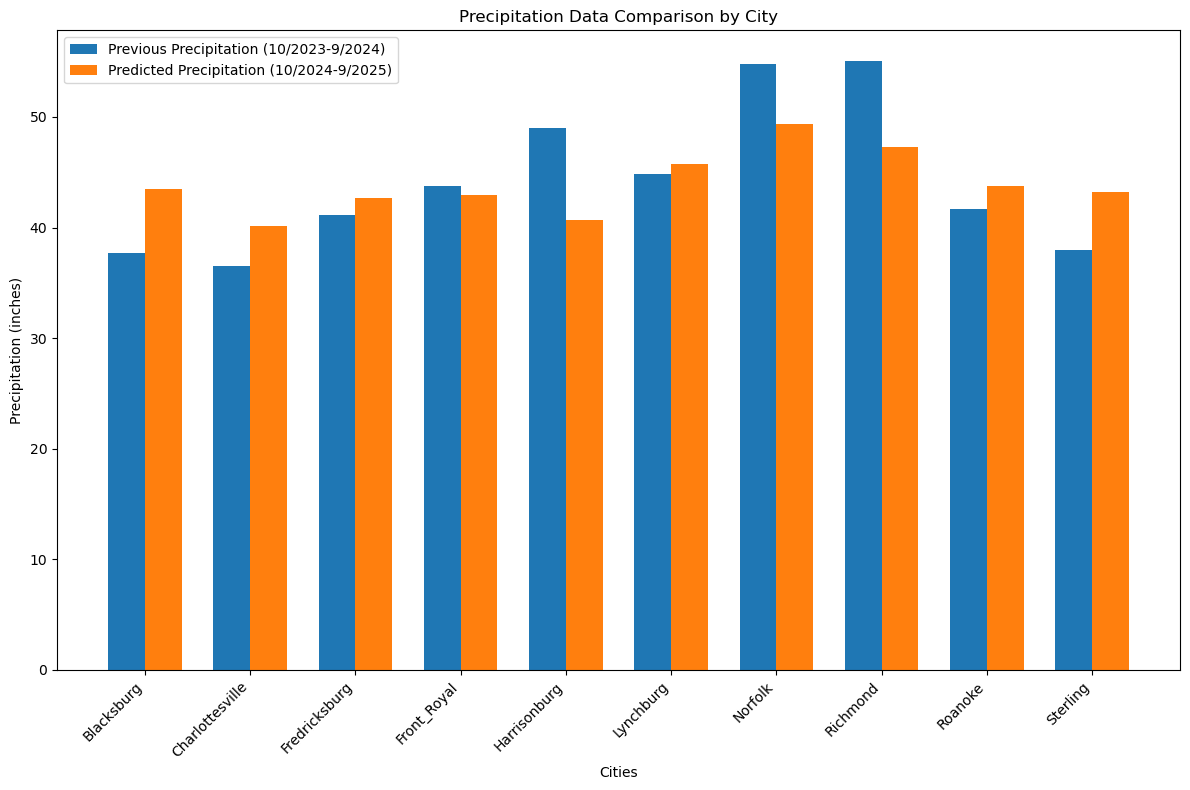

In [7]:

# Set the figure size for the plot
plt.figure(figsize=(12, 8))

# Set the position of the bars
x = range(len(df_results))

# Adjust the width of the bars to ensure they don't overlap
bar_width = 0.35  # Adjust the width of the bars

# Plot bars for 'Previous Precipitation' and 'Predicted Precipitation' with adjusted x positions
plt.bar([i - bar_width / 2 for i in x], df_results['Previous Precipitation (10/2023-9/2024)'], width=bar_width, label='Previous Precipitation (10/2023-9/2024)')
plt.bar([i + bar_width / 2 for i in x], df_results['Predicted Precipitation (10/2024-9/2025)'], width=bar_width, label='Predicted Precipitation (10/2024-9/2025)') 

# Add labels for x and y axes
plt.xlabel('Cities')
plt.ylabel('Precipitation (inches)')

# Set the x-ticks to show the city names
plt.xticks(x, df_results['City'], rotation=45, ha='right')

# Add a title to the chart
plt.title('Precipitation Data Comparison by City')

# Add a legend to differentiate between the categories
plt.legend()

# Show the plot
plt.tight_layout()  # Adjusts the layout to avoid overlap
plt.show()